<a href="https://colab.research.google.com/github/juliablaz2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/RECUPERACI%C3%93N_PR%C3%81CTICA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GRUPO B01
## Julia Callaba Blázquez
## Inés Agudo Martín

1.- Encontrar los máximos de la función "picos"

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

# Paso 1: Instalación de paquetes

Para la implementación del algoritmo genético, se requiere instalar las siguientes bibliotecas de Python:

- Deap: Proporciona herramientas para la creación de algoritmos evolutivos.
- Matplotlib: Utilizado para visualizar datos y resultados de manera gráfica.
- NumPy: Ofrece soporte para operaciones numéricas eficientes.
- SciPy: Proporciona funciones especializadas para tareas científicas y matemáticas.
- Scoop: Facilita la paralelización de tareas en entornos distribuidos.

In [1]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78112 sha256=46f1f52739ca7c78e4bc8362b02ec8543fe525ab3a12d13be3363a2c93b41dd2
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


# Paso 2: Importación de módulos y configuración inicial

Se importan las bibliotecas necesarias, incluyendo random para la generación de números aleatorios, numpy para operaciones numéricas eficientes, y deap para herramientas específicas de algoritmos genéticos. Además, se utiliza matplotlib para visualización de datos en dos y tres dimensiones.

In [2]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paso 3: Generación de datos aleatorios

Se generan conjuntos de números pseudo-aleatorios para las variables 'x' e 'y' mediante list comprehensions, asignando valores en el rango de -100 a 100. Posteriormente, se imprime la información correspondiente a estas listas.

Además, se utiliza la biblioteca NumPy para generar números pseudo-aleatorios en los vectores 'z' y 't'. La semilla del generador de números aleatorios de NumPy se fija con el objetivo de garantizar la consistencia en los resultados. Los vectores resultantes se imprimen para su visualización.

In [3]:
# Genera conjuntos de 10 números pseudoaleatorios en el rango de -100 a 100 para las variables 'x' e 'y' utilizando comprensiones de listas y la función random.uniform().
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]

# Imprime los conjuntos de números generados para 'x' e 'y'.
print('x= ', x)
print('y= ', y)

# Fija la semilla del generador de números aleatorios de NumPy para garantizar la reproducibilidad
np.random.seed(0)

# Genera 10 números pseudoaleatorios en el rango de -100 a 100 utilizando NumPy y los almacena en vectores 'z' y 't', luego los remodela a matrices de 1x10.
z = np.random.uniform(-100, 100, 10).reshape(1, 10)
t = np.random.uniform(-100, 100, 10).reshape(1, 10)

# Imprime las matrices 'z' y 't'.
print('z= ', z)
print('t= ', t)

x=  [-37.16693766299897, -64.29753676222323, 61.51381333359785, 9.475889865235061, 33.90471397118935, -1.8692468266018523, -33.48372042259358, -64.59233558701919, -58.04161650100206, -94.92502003838423]
y=  [71.15605759219017, -43.80009708290904, -75.83845959756363, 63.45634904363979, -26.283835270712515, 60.96128793720436, 78.22327298063146, 17.98823605622391, -99.68887468419967, -91.79024148742603]
z=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
t=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


# Paso 4: Definición de funciones para visualización

Se define una función llamada **plot_evolucion** que se encarga de visualizar la evolución del mejor individuo en cada generación durante la ejecución del algoritmo genético. Esta función toma dos argumentos: **evolucion**, que contiene el registro de la evolución del algoritmo, y **nombre_grafica**, que representa el nombre de la gráfica.

La función extrae la información necesaria del registro **evolucion**, como las generaciones, los valores mínimos, máximos y promedio de la aptitud de la población en cada generación. Luego, utiliza la biblioteca matplotlib para trazar estas métricas en una gráfica.

La gráfica muestra las líneas correspondientes a los valores mínimos, máximos y promedio de aptitud a lo largo de las generaciones. Además, se rellena el área entre la línea de mínimos y la línea de máximos con un color verde transparente para resaltar la variabilidad de la aptitud.

Se establece el título de la gráfica utilizando el argumento **nombre_gráfica** proporcionado.

In [4]:
def plot_evolucion(evolucion, nombre_grafica):
    """
    Plot the evolution of the best individual in each generation
    """
    # Extrae datos del registro de evolución
    gen = evolucion.select("gen") # Generación
    fit_mins = evolucion.select("min") # Fitness mínimo
    fit_maxs = evolucion.select("max")  # Fitness máximo
    fit_ave = evolucion.select("avg")  # Fitness promedio

    # Configura el gráfico
    fig, ax1 = plt.subplots()

    # Grafica las curvas de fitness mínimo, máximo y promedio
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    # Rellena el área entre el mínimo y máximo
    ax1.fill_between(gen, fit_mins, fit_maxs, where=np.array(fit_maxs) >= np.array(fit_mins), facecolor='g', alpha=0.2)

    # Configura etiquetas y leyenda del gráfico
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-20, 20])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True) # Añade una cuadrícula al gráfico
    plt.title(nombre_grafica) # Añade un título al gráfico

# Paso 5: Definición de la función de evaluación

Se define una función llamada **picos** que se encarga de evaluar la aptitud de un individuo en un problema de optimización. Esta función toma como entrada un vector **x** que representa las variables de decisión del problema.

La función comienza iterando sobre los elementos del vector **x** para verificar si alguno de ellos excede los límites de -100 y 100. En caso de que lo hagan, la función devuelve un valor de aptitud de -1, indicando que el individuo es inválido.

Si los elementos de x se encuentran dentro de los límites, la función calcula la aptitud del individuo utilizando una expresión matemática compleja que representa la función objetivo del problema de optimización.



In [5]:
def picos(x):
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = 3 * math.pow(1 - x[0], 2) * math.exp(-math.pow(x[0], 2) - math.pow(x[1] + 1, 2)) - \
          10 * (x[0] / 5 - math.pow(x[0], 3) - math.pow(x[1], 5)) * \
          math.exp(-math.pow(x[0], 2) - math.pow(x[1], 2)) - \
          math.exp(-math.pow(x[0] + 1, 2) - math.pow(x[1], 2)) / 3
    return res,

# Paso 6: Visualización de la función de evaluación

Se realiza la visualización de la función de evaluación en un espacio tridimensional.

Se generan vectores **x** e **y** que abarcan todo el dominio de la función en un rango de -100 a 100, con una granularidad de 1000 puntos en cada dimensión.

Se evalúan todos los posibles pares de valores de **x** e **y** mediante la función de evaluación **picos**, y se genera una matriz **z** que contiene los valores de aptitud correspondientes a cada par de valores de entrada.

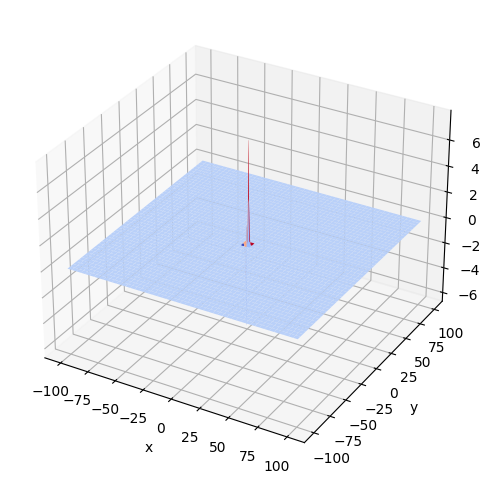

In [6]:
# Se generan vectores que barran todo el dominio
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

# Se evalúan todos los valores de las variables y se genera la matriz z
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
z = np.reshape([picos(val) for val in vals], (1000, 1000))

# Se representan los resultados obtenidos
figure_3d = plt.figure(figsize=(8, 6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, z, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.show() # Mostrar la gráfica

Inicialmente, se verifica que la función es igual a cero en todos los valores, excepto cuando las variables **x** e **y**
y se aproximan a cero.

# Paso 7: Creación de estructuras para algoritmos genéticos

Se crean las clases **FitnessMax** e **Individual** utilizando el módulo creator del paquete DEAP. La clase **FitnessMax** representa la función de aptitud a maximizar, con un peso de 1.0. La clase **Individual** representa a los individuos de la población y hereda de la clase list, incorporando la función de aptitud definida previamente.

Se definen dos cajas de herramientas (**toolbox_twopoint** y **toolbox_uniform**) mediante la clase base.Toolbox. En cada caja de herramientas, se registran diversas operaciones esenciales para la ejecución de algoritmos genéticos:

1. Generación de atributos (attr_uniform): Se registra una función que genera valores uniformemente distribuidos en el rango de -100 a 100.
2. Creación de individuos (individual): Se registra una función que inicializa individuos utilizando la función de generación de atributos y crea listas de longitud 2.

3. Generación de población (population): Se registra una función que inicializa poblaciones de individuos utilizando la función de creación de individuos y crea listas de longitud 32.

4. Evaluación de aptitud (evaluate): Se registra la función de evaluación de aptitud, en este caso, la función picos.

5. Operador de cruce (mate): Se registra el operador de cruce de dos puntos (cxTwoPoint) en la caja de herramientas toolbox_twopoint, y el operador de cruce uniforme (cxUniform) en la caja de herramientas toolbox_uniform.

6. Operador de mutación (mutate): Se registra un operador de mutación gaussiana con media 0, desviación estándar 5, y una probabilidad de mutación de 0.1 en ambas cajas de herramientas.

7. Operador de selección (select): Se registra el operador de selección de torneo con un tamaño de torneo de 3 en ambas cajas de herramientas.

In [7]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox_twopoint = base.Toolbox()
toolbox_twopoint.register("attr_uniform", random.uniform, -100, 100)
toolbox_twopoint.register("individual", tools.initRepeat, creator.Individual,
                 toolbox_twopoint.attr_uniform, 2)
toolbox_twopoint.register("population", tools.initRepeat, list,
                 toolbox_twopoint.individual, 32)
toolbox_twopoint.register("evaluate", picos)
toolbox_twopoint.register("mate", tools.cxTwoPoint)
toolbox_twopoint.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox_twopoint.register("select", tools.selTournament, tournsize=3)

toolbox_uniform = base.Toolbox()
toolbox_uniform.register("attr_uniform", random.uniform, -100, 100)
toolbox_uniform.register("individual", tools.initRepeat, creator.Individual,
                 toolbox_uniform.attr_uniform, 2)
toolbox_uniform.register("population", tools.initRepeat, list,
                 toolbox_uniform.individual, 32)
toolbox_uniform.register("evaluate", picos)
toolbox_uniform.register("mate", tools.cxUniform, indpb=0.5)
toolbox_uniform.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox_uniform.register("select", tools.selTournament, tournsize=3)

# Paso 8: Definición de funciones de cruce y mutación

En el Paso 8, se definen las funciones de cruce y mutación para la realización del algoritmo genético:

- **realizar_twopoint(pop)**: Esta función ejecuta el algoritmo genético utilizando el cruce de dos puntos. Retorna el mejor individuo y el registro de evolución. Los parámetros como la probabilidad de cruce (CXPB), la probabilidad de mutación (MUTPB) y el número de generaciones (NGEN) están predefinidos. Se utiliza un objeto **HallOfFame** para almacenar el mejor individuo encontrado. Además, se registran estadísticas como el promedio, la desviación estándar, el mínimo y el máximo en un objeto **Statistics**. Luego, se ejecuta el algoritmo genético utilizando la función **eaSimple** del paquete DEAP.

- **realizar_uniform(pop)**: Esta función realiza el algoritmo genético utilizando el cruce uniforme. Al igual que la función anterior, devuelve el mejor individuo y el registro de evolución. Todos los parámetros y procesos son similares a los de la función **realizar_twopoint(pop)**, pero se utiliza la caja de herramientas **toolbox_uniform** para las operaciones de cruce y mutación.

Estas dos funciones proporcionan la implementación específica del algoritmo genético para cada tipo de cruce y facilitan la ejecución y comparación de los resultados obtenidos con diferentes estrategias de cruce.

In [8]:
def realizar_twopoint(pop):
    # Esta función realiza el algoritmo genético utilizando el cruce de dos puntos.
    # Devuelve el mejor individuo y el registro de evolución.
    # El objetivo es maximizar la función 'picos'.
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20  # Se definen las probabilidades de cruce y mutación, y el número de generaciones.

    # Se inicializa el objeto HallOfFame para almacenar el mejor individuo.
    hof = tools.HallOfFame(1)

    # Se definen las estadísticas a recolectar.
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean) # Se registra el promedio.
    stats.register("std", np.std)  # Se registra la desviación estándar.
    stats.register("min", np.min)  # Se registra el valor mínimo.
    stats.register("max", np.max)  # Se registra el valor máximo.

    # Se inicializa el registro de evolución.
    logbook = tools.Logbook()

    # Se ejecuta el algoritmo genético utilizando la función eaSimple.
    pop, logbook = algorithms.eaSimple(pop, toolbox_twopoint, cxpb=CXPB,
                                          mutpb=MUTPB, ngen=NGEN, stats=stats,
                                          halloffame=hof, verbose=True)
    # Se devuelve el mejor individuo y el registro de evolución.
    return hof, logbook

def realizar_uniform(pop):
    # Esta función realiza el algoritmo genético utilizando el cruce uniforme.
    # Devuelve el mejor individuo y el registro de evolución.
    # El objetivo es maximizar la función 'picos'.
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20 # Se definen las probabilidades de cruce y mutación, y el número de generaciones.

    # Se inicializa el objeto HallOfFame para almacenar el mejor individuo.
    hof = tools.HallOfFame(1)

    # Se definen las estadísticas a recolectar.
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean) # Se registra el promedio.
    stats.register("std", np.std)  # Se registra la desviación estándar.
    stats.register("min", np.min)  # Se registra el valor mínimo.
    stats.register("max", np.max)  # Se registra el valor máximo.

    # Se inicializa el registro de evolución.
    logbook = tools.Logbook()

    # Se ejecuta el algoritmo genético utilizando la función eaSimple.
    pop, logbook = algorithms.eaSimple(pop, toolbox_uniform, cxpb=CXPB,
                                          mutpb=MUTPB, ngen=NGEN, stats=stats,
                                          halloffame=hof, verbose=True)
    # Se devuelve el mejor individuo y el registro de evolución.
    return hof, logbook

# Paso 9: Ejecución de algoritmos genéticos y recolección de resultados

Se crean cuatro listas vacías para almacenar los mejores resultados y los mejores individuos obtenidos utilizando dos diferentes tipos de cruce: el cruce de dos puntos y el cruce uniforme. Estas listas se utilizarán posteriormente para recolectar y analizar los resultados de los algoritmos genéticos.

In [9]:
lista_mejores_twopoint = list()
lista_mejores_uniform = list()

lista_mejores_twopoint_ind = list()
lista_mejores_uniform_ind = list()

A continuación, se ejecutan los algoritmos genéticos con diferentes semillas para evaluar su desempeño. Se itera sobre un bucle que se repite 20 veces. En cada iteración, se genera una población inicial utilizando el operador de inicialización correspondiente. Los algoritmos genéticos son ejecutados utilizando tanto el cruce de dos puntos como el cruce uniforme. Se registra el mejor individuo y el registro de evolución para cada caso, y se almacenan en listas específicas para su posterior análisis y evaluación.

In [10]:
for i in range(20):
    # Se fija la semilla
    random.seed(i)
    poblacion_twopoint = toolbox_twopoint.population()

    mejor_twopoint, log_twopoint = realizar_twopoint(poblacion_twopoint)
    mejor_uniform, log_uniform = realizar_uniform(poblacion_twopoint)

    lista_mejores_twopoint.append(mejor_twopoint[0].fitness.values)
    lista_mejores_uniform.append(mejor_uniform[0].fitness.values)

    lista_mejores_twopoint_ind.append(mejor_twopoint[0])
    lista_mejores_uniform_ind.append(mejor_uniform[0])

gen	nevals	avg         	std         	min          	max        
0  	32    	2.05256e-125	1.14282e-124	-4.39982e-279	6.5682e-124
1  	17    	4.15586e-118	2.31389e-117	0            	1.32988e-116
2  	12    	1.24677e-117	3.87633e-117	0            	1.32988e-116
3  	18    	0.00945274  	0.0526307   	0            	0.302488    
4  	20    	0.0247413   	0.098625    	-3.08547e-07 	0.489234    
5  	21    	0.034194    	0.109677    	7.09187e-128 	0.489234    
6  	18    	0.133159    	0.191893    	1.32988e-116 	0.489234    
7  	20    	0.233915    	0.218132    	-0.0137064   	0.489234    
8  	14    	0.406955    	0.178098    	-1.9047e-05  	0.489234    
9  	21    	0.473945    	0.0851231   	7.00237e-10  	0.489234    
10 	15    	0.458657    	0.118425    	8.76842e-20  	0.489234    
11 	19    	0.489234    	0           	0.489234     	0.489234    
12 	15    	0.472302    	0.094272    	-0.0525819   	0.489234    
13 	15    	0.477593    	0.0881471   	4.18793e-25  	0.605955    
14 	16    	0.477495    	0.0886776   	-0.00

Imprimimos las estadísticas y visualizaciones del cruce de dos puntos en el algoritmo genético.

Promedio utilizando cruce de dos puntos: 0.469513
Óptimo máximo utilizando cruce de dos puntos: 4.079130
Mejor individuo utilizando cruce de dos puntos: [-0.719209103240197, 1.351464824159494]
Se alcanza con la semilla: 19



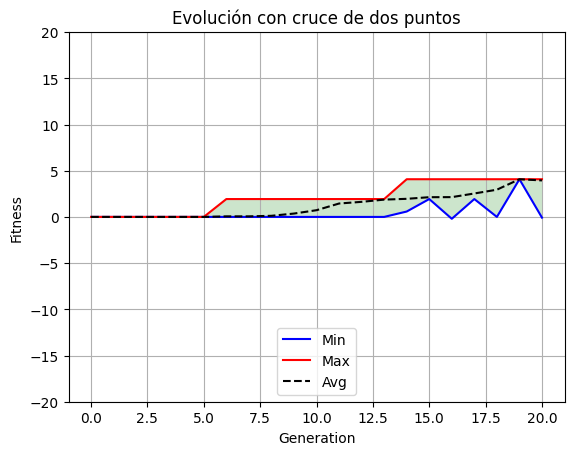

In [11]:
# Cálculo de estadísticas para el cruce de dos puntos
media_twopoint = np.mean(lista_mejores_twopoint)
mejor_total_twopoint = max(lista_mejores_twopoint)
maxpos_twopoint = lista_mejores_twopoint.index(mejor_total_twopoint)

# Se imprimen los resultados del cruce de dos puntos
print("Promedio utilizando cruce de dos puntos: %f" % media_twopoint)
print("Óptimo máximo utilizando cruce de dos puntos: %f" % mejor_total_twopoint)
print("Mejor individuo utilizando cruce de dos puntos: %s" % lista_mejores_twopoint_ind[maxpos_twopoint])
print("Se alcanza con la semilla: %d" % maxpos_twopoint)
print()

# Se visualiza la evolución con cruce de dos puntos
plot_evolucion(log_twopoint, 'Evolución con cruce de dos puntos')

Imprimimos las estadísticas y visualizaciones del cruce uniforme en el algoritmo genético.

Promedio utilizando cruce uniforme: 3.371955
Óptimo máximo utilizando cruce uniforme: 7.710694
Mejor individuo utilizando cruce uniforme: [-0.055058821463028984, 1.7380612772922106]
Se alcanza con la semilla: 6


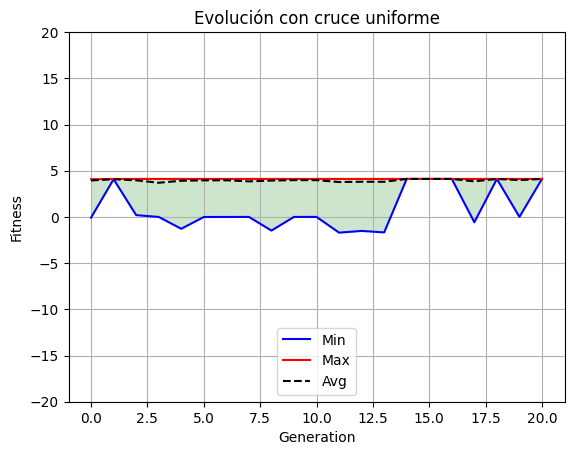

In [12]:
# Cálculo de estadísticas para el cruce uniforme
media_uniform = np.mean(lista_mejores_uniform)
mejor_total_uniform = max(lista_mejores_uniform)
maxpos_uniform = lista_mejores_uniform.index(mejor_total_uniform)

# Se imprimen los resultados del cruce uniforme
print("Promedio utilizando cruce uniforme: %f" % media_uniform)
print("Óptimo máximo utilizando cruce uniforme: %f" % mejor_total_uniform)
print("Mejor individuo utilizando cruce uniforme: %s" % lista_mejores_uniform_ind[maxpos_uniform])
print("Se alcanza con la semilla: %d" % maxpos_uniform)

# Se visualiza la evolución con cruce uniforme
plot_evolucion(log_uniform, 'Evolución con cruce uniforme')

# Conclusión

Para el cruce de dos puntos, se observa un promedio de aptitud de aproximadamente 0.47 y un óptimo máximo de alrededor de 4.08. El mejor individuo encontrado tiene un valor de [-0.719, 1.351], y este resultado se logró utilizando la semilla 19.

Por otro lado, para el cruce uniforme, el promedio de aptitud es más alto, alrededor de 3.37, y el óptimo máximo es de aproximadamente 7.71. El mejor individuo tiene un valor de [-0.055, 1.738], y se obtuvo utilizando la semilla 6.

Estos resultados sugieren que, el cruce uniforme tiende a generar mejores soluciones en comparación con el cruce de dos puntos, como se evidencia en el mayor promedio de aptitud y el óptimo máximo alcanzado.

2.- Dada la [Función de Rastringin](https://en.wikipedia.org/wiki/Rastrigin_function#:~:text=In%20mathematical%20optimization%2C%20the%20Rastrigin,has%20been%20generalized%20by%20Rudolph.), con A = 10 y  $$\{xi\} \in [-5.12,5.12]$$

Implementa dicha función en Python y minimízala para n=10

# Paso 1: Importación de módulos y configuración inicial


Importamos las bibliotecas necesarias.

In [13]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Paso 2: Generación de datos aleatorios

Se generan conjuntos de datos aleatorios para las variables 'x' e 'y', asignándoles valores en el rango de -5.12 a 5.12. Los resultados se imprimen para su visualización. Además, se utiliza NumPy para generar matrices de números aleatorios con la semilla fijada en 0.

In [14]:
# Genera conjuntos de 10 números pseudoaleatorios en el rango de -5.12 a 5.12 para las variables 'x' e 'y' utilizando comprensiones de listas y la función random.uniform().
x = [random.uniform(-5.12, 5.12) for i in range(10)]
y = [random.uniform(-5.12, 5.12) for i in range(10)]

# Imprime los conjuntos de números generados para 'x' e 'y'.
print('x= ', x)
print('y= ', y)

# Fija la semilla del generador de números aleatorios de NumPy para reproducibilidad.
np.random.seed(0)

# Genera 10 números pseudoaleatorios en el rango de -5.12 a 5.12 utilizando NumPy y los almacena en vectores 'z' y 't', luego los remodela a matrices de 1x10.
z = np.random.uniform(-5.12, 5.12, 10).reshape(1, 10)
t = np.random.uniform(-5.12, 5.12, 10).reshape(1, 10)

# Imprime las matrices 'z' y 't'.
print('z= ', z)
print('t= ', t)

x=  [4.085728962152969, 3.621690894708988, -0.8351016278080579, 0.762916982472956, 3.4713885069499506, 1.179806326335684, 1.9763142032596583, -4.788382410344093, 2.1762788449957915, -0.8438375989919162]
y=  [-2.467436266363668, -2.9912761146456193, -1.2378208503910901, -0.10418242565900293, 1.125530863781023, -3.8794793863275627, -1.2608112051660725, 0.09064375162418159, 0.21555610759391275, -0.9452512925353904]
z=  [[ 0.49985028  2.20353911  1.05229697  0.45960379 -0.78177485  1.49395572
  -0.63910696  4.01175553  4.74790667 -1.19355885]]
t=  [[ 2.98726439  0.29588398  0.69677631  4.35810958 -4.39259076 -4.22779597
  -4.91296361  3.40602722  2.84832513  3.7889244 ]]


# Paso 3: Definición de funciones para visualización

Volvemos a definir la función **plot_evolucion**, pero con un cambio específico: sustituimos **ax1.set_ylim([0, 20])** por **[0, 300]** para ajustar el límite superior del eje y del gráfico. Por lo demás, esta función es idéntica a la que hemos definido previamente en el ejercicio 1. Ambas versiones de la función extraen los datos del registro de evolución, configuran el gráfico, trazan las curvas de fitness mínimo, máximo y promedio, rellenan el área entre el mínimo y máximo, y configuran etiquetas, leyendas y título del gráfico de manera consistente.

In [15]:
def plot_evolucion(evolucion, nombre_grafica):
    """
    Plot the evolution of the best individual in each generation
    """
    # Extrae datos del registro de evolución
    gen = evolucion.select("gen") # Generación
    fit_mins = evolucion.select("min") # Fitness mínimo
    fit_maxs = evolucion.select("max")  # Fitness máximo
    fit_ave = evolucion.select("avg")  # Fitness promedio

    # Configura el gráfico
    fig, ax1 = plt.subplots()

    # Grafica las curvas de fitness mínimo, máximo y promedio
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    # Rellena el área entre el mínimo y máximo
    ax1.fill_between(gen, fit_mins, fit_maxs, where=np.array(fit_maxs) >= np.array(fit_mins), facecolor='g', alpha=0.2)

    # Configura etiquetas y leyenda del gráfico
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([0, 300])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True) # Añade una cuadrícula al gráfico
    plt.title(nombre_grafica) # Añade un título al gráfico

# Paso 4: Definición de la función de evaluación

Definimos la función **rastrigin** para un vector de entrada **x**, donde **A** es una constante fijada en 10, **n** representa la longitud del vector **x**, y **res** almacena el resultado del cálculo. La función devuelve **res** como el resultado de la función Rastrigin aplicada al vector **x**.

In [16]:
def rastrigin(x):
    A = 10
    n = len(x)
    res = A * n + sum([(xi ** 2 - A * np.cos(2 * math.pi * xi)) for xi in x])
    return res,

# Paso 5: Visualización de la función de evaluación

Se realiza la visualización de la función de evaluación en un espacio tridimensional.

Se generan vectores **x** e **y** que abarcan todo el dominio de la función en un rango de -5.12 a 5.12, con una granularidad de 1000 puntos en cada dimensión.

Se evalúan todos los posibles pares de valores de **x** e **y** mediante la función de evaluación **rastrigin**, y se genera una matriz **z** que contiene los valores de aptitud correspondientes a cada par de valores de entrada.

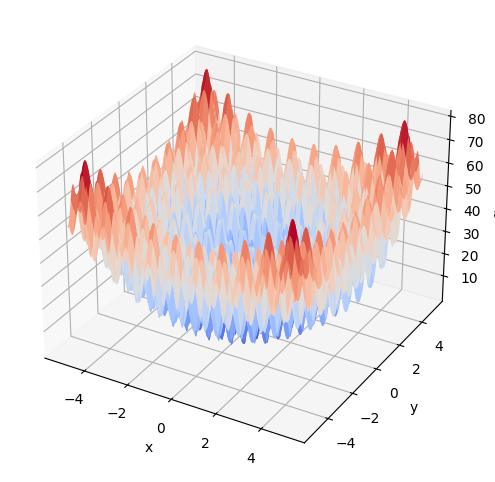

In [17]:
# Se generan vectores que barran todo el dominio
x = np.linspace(-5.12, 5.12, 1000)
y = np.linspace(-5.12, 5.12, 1000)

# Se evalúan todos los valores de las variables y se genera la matriz z
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
z = np.reshape([rastrigin(val) for val in vals], (1000, 1000))

# Se representan los resultados obtenidos
figure_3d = plt.figure(figsize=(8, 6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, z, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.show() # Mostrar la gráfica

La gráfica es una representación tridimensional que muestra un rango de valores a través de tres ejes. Hay puntos de datos presentados en la gráfica, cada uno con un color único. Los puntos de datos visibles en la gráfica varían en el eje X desde -4 hasta 80, en el eje Y desde -4 hasta 2, y en el eje Z desde 10 hasta 70.

# Paso 6: Creación de estructuras para algoritmos genéticos

En el ejercicio 1 se buscaba maximizar la función de aptitud, pero ahora se requiere minimizarla. Por tanto, ajustamos las definiciones de clases y operaciones de las cajas de herramientas para adaptarnos a este cambio de objetivo. Se definen las clases FitnessMin e Individual utilizando el módulo creator de DEAP, donde FitnessMin representa la función de aptitud a minimizar con un peso de -1.0, y la clase Individual representa a los individuos de la población, heredando de la clase list junto con la función de aptitud previamente definida.

Para adaptarnos al cambio de objetivo de maximización a minimización, hemos realizado ajustes en la definición de las clases y en las operaciones de las cajas de herramientas.

Las modificaciones específicas que hemos realizado incluyen:

1. Generación de atributos (attr_uniform): Se registra una función que genera valores uniformemente distribuidos en el rango de -5.12 a 5.12.

2. Creación de individuos (individual): Se registra una función que inicializa individuos utilizando la función de generación de atributos y crea listas de longitud 10.

3. Generación de población (population): Se registra una función que inicializa poblaciones de individuos utilizando la función de creación de individuos y crea listas de longitud 30.

4. Evaluación de aptitud (evaluate): Se registra la función de evaluación de aptitud, en este caso, la función rastrigin.

5. Operador de cruce (mate): Se registra el operador de cruce de dos puntos (cxTwoPoint) en la caja de herramientas toolbox_twopoint, y el operador de cruce uniforme (cxUniform) en la caja de herramientas toolbox_uniform.

6. Operador de mutación (mutate): Se registra un operador de mutación gaussiana con media 0, desviación estándar 5, y una probabilidad de mutación de 0.1 en ambas cajas de herramientas.

7. Operador de selección (select): Se registra el operador de selección de torneo con un tamaño de torneo de 3 en ambas cajas de herramientas.

In [18]:
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox_twopoint = base.Toolbox()
toolbox_twopoint.register("attr_uniform", random.uniform, -5.12, 5.12)
toolbox_twopoint.register("individual", tools.initRepeat, creator.Individual,
                          toolbox_twopoint.attr_uniform, 10)
toolbox_twopoint.register("population", tools.initRepeat, list,
                          toolbox_twopoint.individual, 30)
toolbox_twopoint.register("evaluate", rastrigin)
toolbox_twopoint.register("mate", tools.cxTwoPoint)
toolbox_twopoint.register("mutate", tools.mutGaussian, mu=0,
                          sigma=5, indpb=0.1)
toolbox_twopoint.register("select", tools.selTournament, tournsize=3)

toolbox_uniform = base.Toolbox()
toolbox_uniform.register("attr_uniform", random.uniform, -5.12, 5.12)
toolbox_uniform.register("individual", tools.initRepeat, creator.Individual,
                         toolbox_uniform.attr_uniform, 10)
toolbox_uniform.register("population", tools.initRepeat, list,
                         toolbox_uniform.individual, 30)
toolbox_uniform.register("evaluate", rastrigin)
toolbox_uniform.register("mate", tools.cxUniform, indpb=0.5)
toolbox_uniform.register("mutate", tools.mutGaussian, mu=0,
                         sigma=5, indpb=0.1)
toolbox_uniform.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# Paso 7: Definición de funciones de cruce y mutación

En el Paso 7, se definen las funciones de cruce y mutación para la realización del algoritmo genético:

- `realizar_twopoint(pop)`: Esta función ejecuta el algoritmo genético utilizando el cruce de dos puntos. Retorna el mejor individuo y el registro de evolución. Los parámetros como la probabilidad de cruce (CXPB), la probabilidad de mutación (MUTPB), y el número de generaciones (NGEN) están predefinidos. Se utiliza un objeto `HallOfFame` para almacenar el mejor individuo encontrado y se registran estadísticas como el promedio, la desviación estándar, el mínimo y el máximo en un objeto `Statistics`. Luego, se ejecuta el algoritmo genético utilizando la función `eaSimple` del paquete DEAP.

- `realizar_uniform(pop)`: Esta función realiza el algoritmo genético utilizando el cruce uniforme. Al igual que la función anterior, devuelve el mejor individuo y el registro de evolución. Todos los parámetros y procesos son similares a los de la función `realizar_twopoint(pop)`, pero se utiliza la caja de herramientas `toolbox_uniform` para las operaciones de cruce y mutación. Estas dos funciones proporcionan la implementación específica del algoritmo genético para cada tipo de cruce y facilitan la ejecución y comparación de los resultados obtenidos con diferentes estrategias de cruce.

Lo único que hemos ajustado con respecto al ejercicio anterior son los valores de CXPB, MUTPB y NGEN, que ahora son 0.7, 0.2 y 100 respectivamente. Esta modificación se realiza para adaptar el algoritmo genético a las características específicas del problema actual.

In [19]:
def realizar_twopoint(pop):
    # Esta función realiza el algoritmo genético utilizando el cruce de dos puntos.
    # Devuelve el mejor individuo y el registro de evolución.
    # El objetivo es maximizar la función 'rastrigin'.
    CXPB, MUTPB, NGEN = 0.7, 0.2, 100  # Se definen las probabilidades de cruce y mutación, y el número de generaciones.

    # Se inicializa el objeto HallOfFame para almacenar el mejor individuo.
    hof = tools.HallOfFame(1)

    # Se definen las estadísticas a recolectar.
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean) # Se registra el promedio.
    stats.register("std", np.std)  # Se registra la desviación estándar.
    stats.register("min", np.min)  # Se registra el valor mínimo.
    stats.register("max", np.max)  # Se registra el valor máximo.

    # Se inicializa el registro de evolución.
    logbook = tools.Logbook()

    # Se ejecuta el algoritmo genético utilizando la función eaSimple.
    pop, logbook = algorithms.eaSimple(pop, toolbox_twopoint, cxpb=CXPB,
                                          mutpb=MUTPB, ngen=NGEN, stats=stats,
                                          halloffame=hof, verbose=True)
    # Se devuelve el mejor individuo y el registro de evolución.
    return hof, logbook

def realizar_uniform(pop):
    # Esta función realiza el algoritmo genético utilizando el cruce uniforme.
    # Devuelve el mejor individuo y el registro de evolución.
    # El objetivo es maximizar la función 'rastrigin'.
    CXPB, MUTPB, NGEN = 0.7, 0.2, 100 # Se definen las probabilidades de cruce y mutación, y el número de generaciones.

    # Se inicializa el objeto HallOfFame para almacenar el mejor individuo.
    hof = tools.HallOfFame(1)

    # Se definen las estadísticas a recolectar.
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean) # Se registra el promedio.
    stats.register("std", np.std)  # Se registra la desviación estándar.
    stats.register("min", np.min)  # Se registra el valor mínimo.
    stats.register("max", np.max)  # Se registra el valor máximo.

    # Se inicializa el registro de evolución.
    logbook = tools.Logbook()

    # Se ejecuta el algoritmo genético utilizando la función eaSimple.
    pop, logbook = algorithms.eaSimple(pop, toolbox_uniform, cxpb=CXPB,
                                          mutpb=MUTPB, ngen=NGEN, stats=stats,
                                          halloffame=hof, verbose=True)
    # Se devuelve el mejor individuo y el registro de evolución.
    return hof, logbook

# Paso 8: Ejecución de algoritmos genéticos y recolección de resultados

Se crean cuatro listas vacías para almacenar los mejores resultados y los mejores individuos obtenidos utilizando dos diferentes tipos de cruce: el cruce de dos puntos y el cruce uniforme. Estas listas se utilizarán posteriormente para recolectar y analizar los resultados de los algoritmos genéticos.

In [20]:
lista_mejores_twopoint = list()
lista_mejores_uniform = list()

lista_mejores_twopoint_ind = list()
lista_mejores_uniform_ind = list()

En esta parte, hemos implementado un procedimiento idéntico al del ejercicio anterior, donde se configura una serie de experimentos para evaluar y comparar la efectividad de dos métodos de cruce en algoritmos genéticos: cruce de dos puntos y cruce uniforme.

In [21]:
for i in range(20):
    # Se fija la semilla
    random.seed(i)
    poblacion_twopoint = toolbox_twopoint.population()

    mejor_twopoint, log_twopoint = realizar_twopoint(poblacion_twopoint)
    mejor_uniform, log_uniform = realizar_uniform(poblacion_twopoint)

    lista_mejores_twopoint.append(mejor_twopoint[0].fitness.values)
    lista_mejores_uniform.append(mejor_uniform[0].fitness.values)

    lista_mejores_twopoint_ind.append(mejor_twopoint[0])
    lista_mejores_uniform_ind.append(mejor_uniform[0])

gen	nevals	avg    	std    	min    	max    
0  	30    	179.961	30.5024	119.579	248.899
1  	24    	153.197	34.4335	99.0298	249.525
2  	21    	124.235	20.7446	82.9766	177.044
3  	22    	112.244	22.79  	66.9868	151.95 
4  	22    	95.1477	24.9741	46.2672	166.167
5  	25    	83.6367	20.9799	46.2672	145.132
6  	27    	75.2279	22.4507	46.2672	140.509
7  	27    	62.9887	13.7595	39.94  	107.955
8  	23    	55.2621	16.5395	39.94  	131.298
9  	21    	47.1488	7.10341	39.94  	66.9848
10 	23    	50.933 	25.5914	39.94  	175.958
11 	27    	43.8621	8.87628	39.94  	84.7273
12 	25    	50.7207	35.3354	39.94  	220.717
13 	24    	40.4952	2.98986	39.94  	56.5961
14 	22    	46.7958	25.1714	37.4021	165.734
15 	25    	46.9203	39.011 	37.4021	256.961
16 	24    	43.8964	13.7915	37.4021	99.3338
17 	18    	45.3163	15.0464	37.4021	97.4193
18 	20    	40.3985	14.0398	34.1496	114.807
19 	21    	39.5004	7.87438	34.1496	75.3879
20 	17    	38.1898	6.23363	34.1496	64.7195
21 	22    	38.9713	15.7749	34.1496	119.969
22 	21    	

Imprimimos las estadísticas y visualizaciones del cruce de dos puntos en el algoritmo genético.

Promedio utilizando cruce de dos puntos: 19.056345
Óptimo mínimo utilizando cruce de dos puntos: 11.725120
Mejor individuo utilizando cruce de dos puntos: [0.0633232543507245, -1.0067307472060365, -0.08505317109533017, 0.046419428169856225, -0.053833637623991626, -1.131118845605218, 0.025704674067008382, -0.046462242182801816, -0.07093384191970098, 0.9442589325804522]
Se alcanza con la semilla: 6



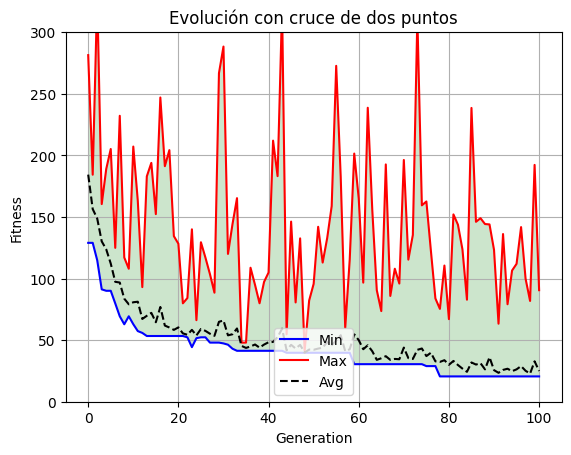

In [22]:
# Cálculo de estadísticas para el cruce de dos puntos
media_twopoint = np.mean(lista_mejores_twopoint)
mejor_total_twopoint = min(lista_mejores_twopoint)
minpos_twopoint = lista_mejores_twopoint.index(mejor_total_twopoint)

# Se imprimen los resultados del cruce de dos puntos
print("Promedio utilizando cruce de dos puntos: %f" % media_twopoint)
print("Óptimo mínimo utilizando cruce de dos puntos: %f" % mejor_total_twopoint)
print("Mejor individuo utilizando cruce de dos puntos: %s" % lista_mejores_twopoint_ind[minpos_twopoint])
print("Se alcanza con la semilla: %d" % minpos_twopoint)
print()

# Se visualiza la evolución con cruce de dos puntos
plot_evolucion(log_twopoint, 'Evolución con cruce de dos puntos')

Imprimimos las estadísticas y visualizaciones del cruce uniforme en el algoritmo genético.

Promedio utilizando cruce uniforme: 11.169017
Óptimo mínimo utilizando cruce uniforme: 6.235917
Mejor individuo utilizando cruce uniforme: [0.03390681954430219, -0.08493998997572216, -1.0064566318504675, 0.9515076600642072, -0.012330505951728021, -0.9845855587204971, -0.049374584954038014, 0.039500434347163216, 0.0017755252537638364, 0.04441537962613218]
Se alcanza con la semilla: 9


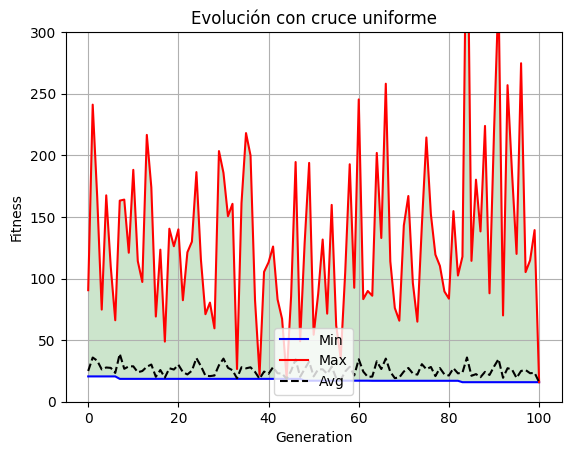

In [23]:
# Cálculo de estadísticas para el cruce uniforme
media_uniform = np.mean(lista_mejores_uniform)
mejor_total_uniform = min(lista_mejores_uniform)
minpos_uniform = lista_mejores_uniform.index(mejor_total_uniform)

# Se imprimen los resultados del cruce uniforme
print("Promedio utilizando cruce uniforme: %f" % media_uniform)
print("Óptimo mínimo utilizando cruce uniforme: %f" % mejor_total_uniform)
print("Mejor individuo utilizando cruce uniforme: %s" % lista_mejores_uniform_ind[minpos_uniform])
print("Se alcanza con la semilla: %d" % minpos_uniform)

# Se visualiza la evolución con cruce uniforme
plot_evolucion(log_uniform, 'Evolución con cruce uniforme')

# Conclusión

El cruce uniforme se muestra superior, con un promedio de 11.169 y un mínimo de 6.235, indicando una mayor efectividad y consistencia en encontrar soluciones cercanas al mínimo global.

En contraste, el cruce de dos puntos, aunque alcanzó un mínimo de 11.725, tuvo un promedio más alto de 19.056 y mostró una mayor variabilidad en las métricas de aptitud a lo largo de las generaciones.

Esto nos sugiere que, mientras el cruce de dos puntos puede explorar el espacio de búsqueda de manera más dispersa, el cruce uniforme ofrece una convergencia más estable y efectiva hacia soluciones de alta calidad.